In [1]:
import pandas as pd
from importlib import reload

from src import constants as C
from src.statistics import participant_scan_patterns as P
from src.viz import visualisations_scan_patterns as PV  # if you made this

reload(P)
reload(PV)

<module 'src.viz.visualisations_scan_patterns' from 'C:\\Users\\deeth\\PycharmProjects\\QA_eyetracking\\src\\viz\\visualisations_scan_patterns.py'>

In [2]:
hunters = pd.read_csv("../data/hunters.csv")
gatherers = pd.read_csv("../data/gatherers.csv")

In [3]:
results = P.run_trial_preference_screening(
    hunters,
    gatherers,
    metric=C.MEAN_DWELL_TIME,
    uniform_rel_range=0.15,
    min_pref_strength=0.20,
    save=True,
)

hunters_trials = results["hunters"]
gatherers_trials = results["gatherers"]

In [4]:
hunters_pref = P.add_trial_preference_group(hunters_trials)
gatherers_pref = P.add_trial_preference_group(gatherers_trials)


In [5]:
print("Hunters:")
print(P.compute_global_preference_stats(hunters_pref))

print("\nGatherers:")
print(P.compute_global_preference_stats(gatherers_pref))

Hunters:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0          9719         31        2173        7515       0.00319   

   prop_mismatch  prop_matching  
0       0.223583       0.773228  

Gatherers:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0          9717         40        2375        7302      0.004116   

   prop_mismatch  prop_matching  
0       0.244417       0.751467  


In [6]:
# per-participant summaries
hunters_pp = P.compute_participant_preference_summary(hunters_pref)
gatherers_pp = P.compute_participant_preference_summary(gatherers_pref)

# correctness by group
corr_hunters = P.correctness_by_group(hunters_pref)
corr_gatherers = P.correctness_by_group(gatherers_pref)

print("\nHunters correctness:")
print(corr_hunters)

print("\nGatherers correctness:")
print(corr_gatherers)



Hunters correctness:
  pref_group  correct_rate  n_trials  n_correct
0   matching         0.874      7515       6566
1   mismatch         0.854      2173       1855
2    uniform         0.903        31         28

Gatherers correctness:
  pref_group  correct_rate  n_trials  n_correct
0   matching         0.814      7302       5945
1   mismatch         0.804      2375       1909
2    uniform         0.900        40         36


C:\Users\deeth\PycharmProjects\QA_eyetracking\src\viz\visualisations_scan_patterns.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pref_group")[Con.IS_CORRECT_COLUMN]


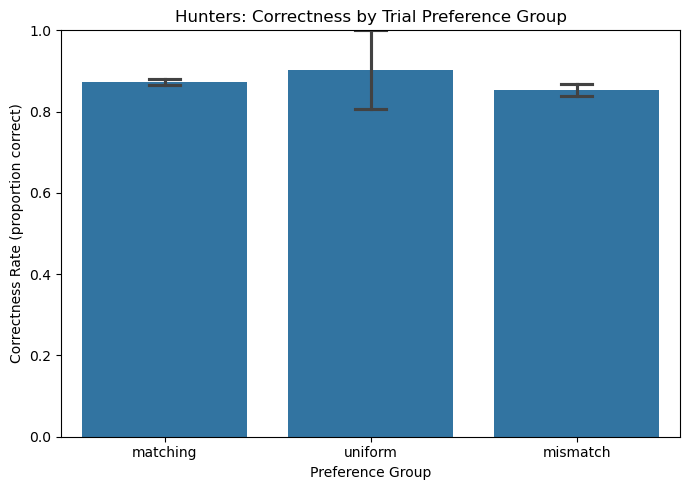

C:\Users\deeth\PycharmProjects\QA_eyetracking\src\viz\visualisations_scan_patterns.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pref_group")[Con.IS_CORRECT_COLUMN]


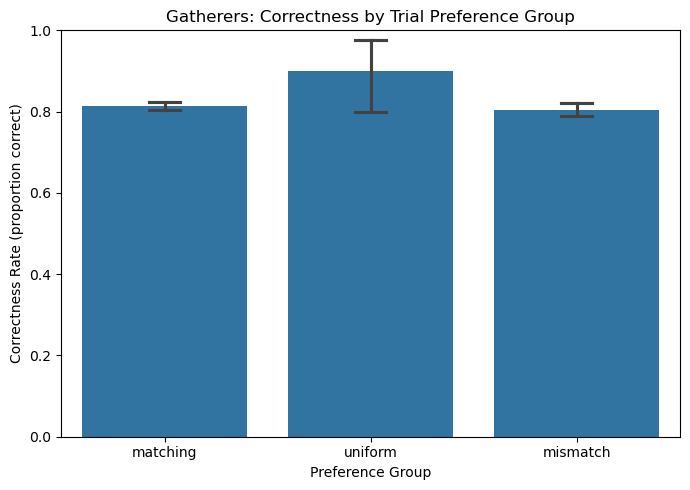

,pref_group,correct_rate,n_trials
0,matching,0.814,7302
1,uniform,0.900,40
2,mismatch,0.804,2375


In [7]:
PV.plot_correctness_by_group(hunters_pref, label="Hunters", save=True)
PV.plot_correctness_by_group(gatherers_pref, label="Gatherers", save=True)